In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

mpl.style.use(['ggplot'])

In [2]:
df_can = pd.read_excel('Canada.xlsx',
                sheet_name='Canada by Citizenship',
                skiprows=range(20),
                skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

#### Data Processing

In [5]:
# Rename Columns
df_can = df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'})

# Drop Columns we won't be using
df_can = df_can.drop(['Type','AREA','REG','DEV'], axis=1)

# Re-index the dataset to have the countries as the index
df_can = df_can.set_index('Country')

# Drop Index Name
df_can.index.name = None

# Create a Total Immigrants column 
df_can['TotalImm'] = df_can.loc[:,1980:].sum(axis=1)

# Convert Columns into string
df_can.columns = list(map(str, df_can.columns))

In [6]:
df_can.head(3)

,Coverage,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImm
Afghanistan,Foreigners,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Foreigners,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Foreigners,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


### Plotting
#### Line Plot

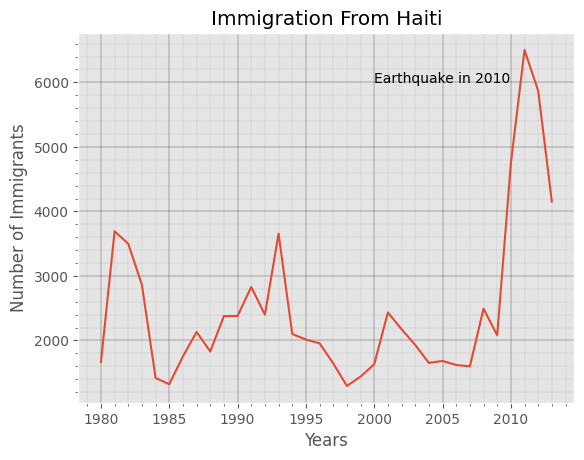

In [7]:
# Plot of Haiti Immigrants

# Declare years variable to use when plotting
years = list(map(str, (range(1980,2014))))

# Choose Haiti Series to plot
Haiti = df_can.loc['Haiti', years] 

# Convert Index to Integers
Haiti.index = Haiti.index.map(int)

# Plotting the data
Haiti.plot(kind='line')
plt.title('Immigration From Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.text(2000,6000, 'Earthquake in 2010')

# Putting grid lines for easier selection of data point
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.2', color='black')
plt.grid(which='minor', linestyle=':', linewidth='.1', color='black')

plt.show()

### Area Plots

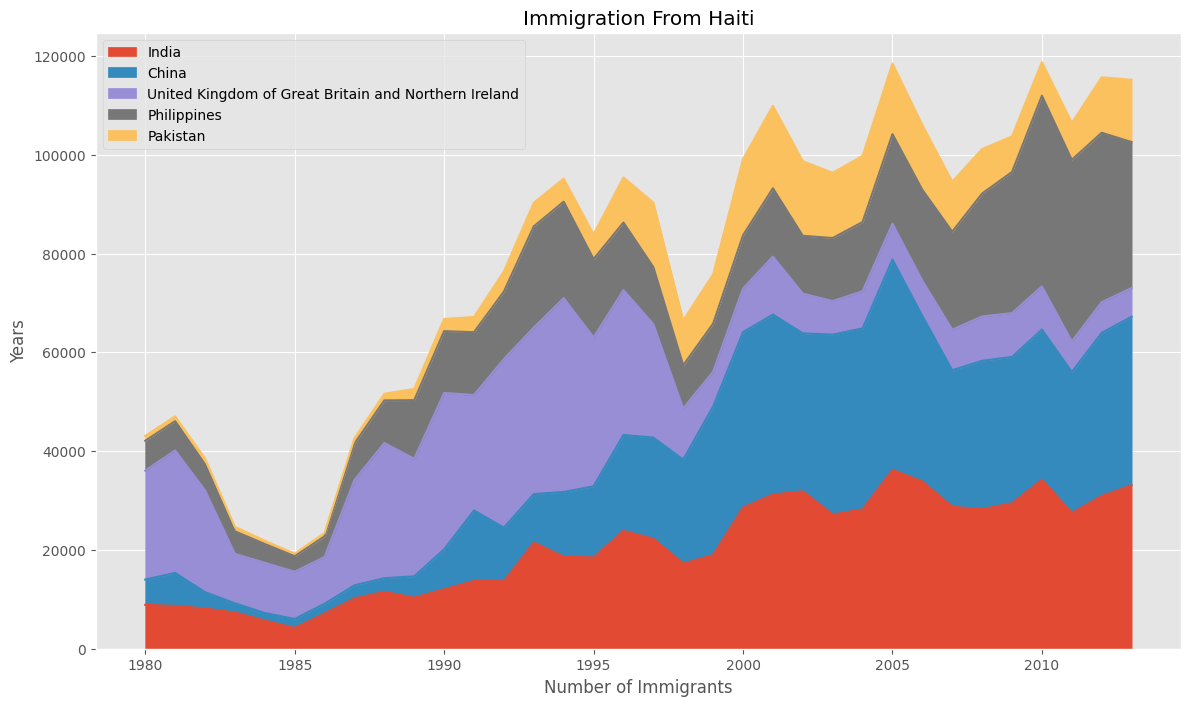

In [8]:
# Plotting top 5 countries with most immigrants

# Selecting data
top_5 = df_can.sort_values(by='TotalImm', ascending=False)[:5]

# Transpose the data since matplotlib plots indices on the horizontal line 
top_5 = top_5.loc[top_5.index, years].T

# Plotting the data
top_5.plot(kind='area', figsize=(14,8))
plt.title('Immigration From Haiti')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.show()

#### Histograms

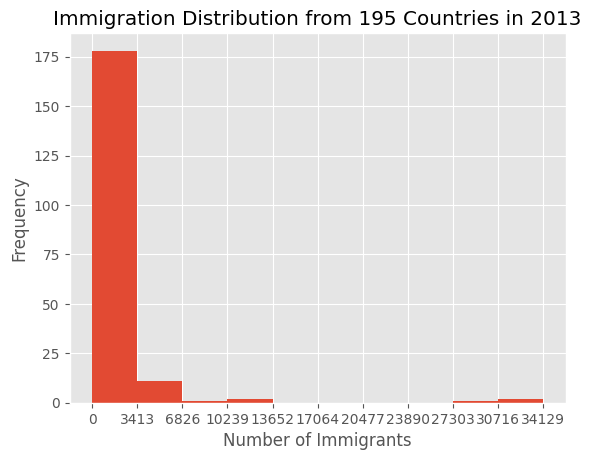

In [9]:
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', xticks=bin_edges)

plt.title('Immigration Distribution from 195 Countries in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Frequency')

plt.show()

#### Bar Chart

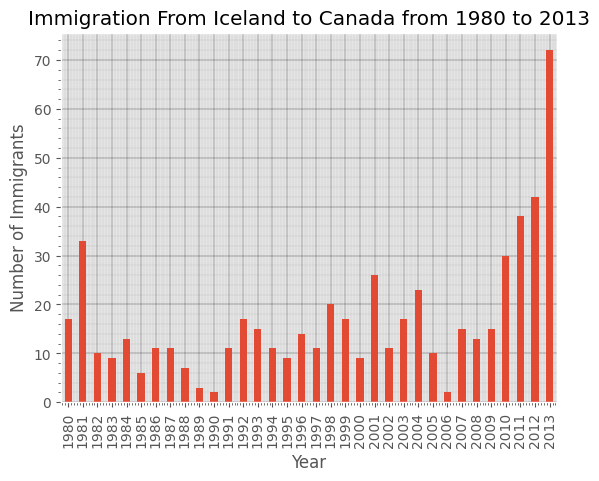

In [10]:
# Plot Immigration from Iceland to Canada from 1980 to 2013
df_can.loc['Iceland', years].index = df_can.loc['Iceland', years].index.map(int)
df_can.loc['Iceland', years].plot(kind='bar')


plt.title('Immigration From Iceland to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

# Use grid lines
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.2', color='black')
plt.grid(which='minor', linestyle=':', linewidth='.1', color='black')

plt.show()

#### Pie Charts

In [15]:
for name, hex in mpl.colors.cnames.items():
    print(name,hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


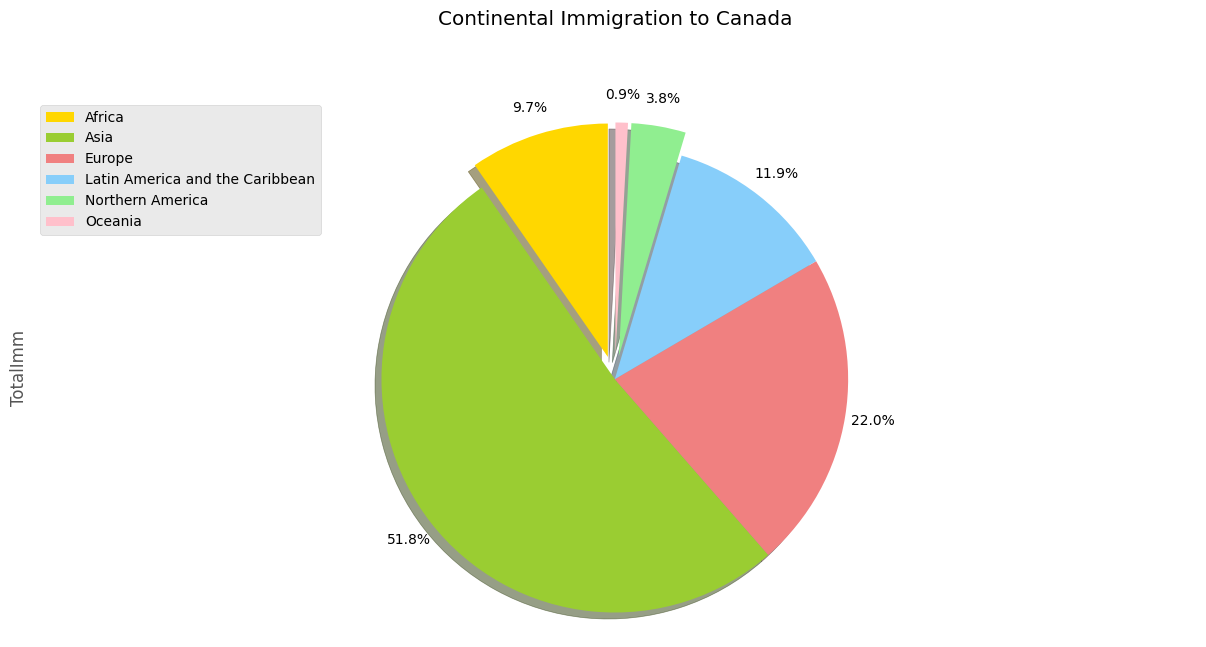

In [28]:
df_cont = df_can.groupby('Continent').sum()
df_cont = df_cont.loc[df_cont.index, '1980':]

color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1,0,0,0,0.1,0.1]

df_cont['TotalImm'].plot(kind='pie',
                        autopct='%1.1f%%',
                        figsize=(15,7),
                        startangle=90,
                        explode=explode_list,
                        colors=color_list,
                        shadow=True,
                        pctdistance=1.12,
                        labels=None)
plt.legend(df_cont.index, loc='upper left')

plt.axis('equal')

plt.title('Continental Immigration to Canada', y=1.12)

plt.show()

#### Box Plots

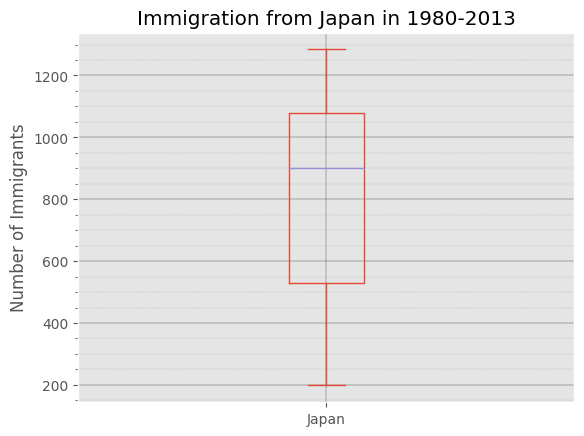

In [12]:
#Getting the data
df_japan = df_can.loc[['Japan'], years]
df_japan = df_japan.T

#Plotting
df_japan.plot(kind='box')

#Labeling the Chart
plt.title('Immigration from Japan in 1980-2013')
plt.ylabel('Number of Immigrants')

# Use grid lines
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.2', color='black')
plt.grid(which='minor', linestyle=':', linewidth='.1', color='black')

plt.show()

#### Scatter

In [42]:
# Getting the Data
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = df_tot.index.map(int)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['Year', 'Total']
df_tot.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


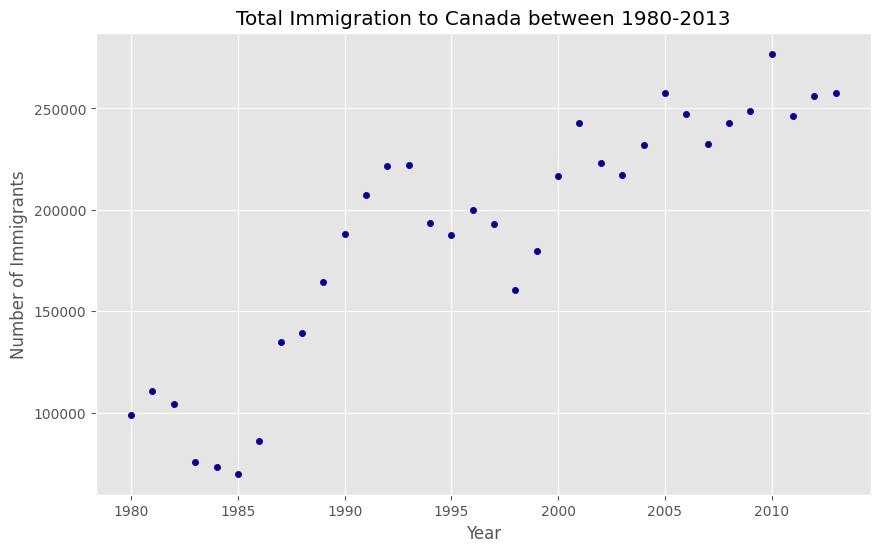

In [47]:
# Plotting Scatter
df_tot.plot(kind='scatter', x='Year', y='Total', color='darkblue', figsize=(10,6))

plt.title('Total Immigration to Canada between 1980-2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

plt.show()

##### Plotting linear line of best fit

In [51]:
# Getting the Equation
x = df_tot['Year']
y = df_tot['Total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

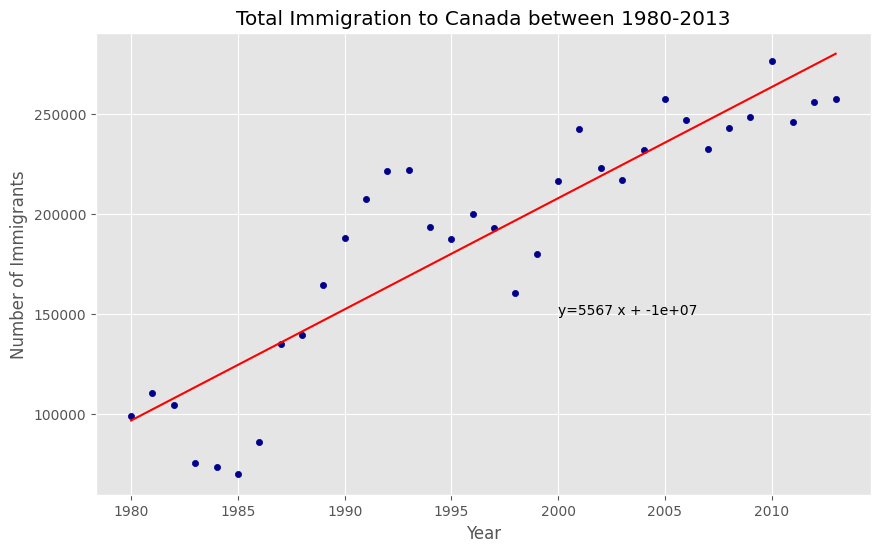

No. Immigrants = 5567 * Year + -10926195


In [52]:
# Plotting the regression line on the scatter plot

# Plotting Scatter
df_tot.plot(kind='scatter', x='Year', y='Total', color='darkblue', figsize=(10,6))

plt.title('Total Immigration to Canada between 1980-2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

# Plot line of best fit
plt.plot(x, fit[0]*x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0}'.format(fit[0], fit[1]), xy=(2000,150000))

plt.show()

# Print line of best fit
print('No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]))